# Practice Midterm A

# Name: write your name here


### Learning Objective:

- Create Python code to automate a given task.

### Instructions:

This practice midterm tests your mastery of skills taught in Weeks 1-5, which culminates in creating simulation models using Python and algorithmic thinking. You have 80 minutes from the time you clicked "Begin" on Blackboard. **After completing this Jupyter notebook, make sure to save it, then attach the .ipynb file to Blackboard and submit. (For the actual midterm, immediately after submitting, email your solution file to the professor in case Blackboard malfunctions. You don't have to do this for the practice midterm.)**


You are allowed to consult any resources posted online as well as any book or notes, but you CANNOT ask someone for help, or share your solutions with anyone other than the professor. **Any violation of academic integrity will result in a failing grade for everyone involved.**

**For each problem, you should place all your final code in one cell, with the comment "# Final Solution" on top. This cell should include all necessary imports and definitions, so that if one restarts the kernel and only runs that cell, the test code will work.** Only the correctness of your final code matters: as long as you fulfill all the specifications described in the problem description, it doesn't matter how you solve the problem or how efficient is your code. However, if you cannot solve a problem, you may get partial credits for submitting whatever you have, including any parts of the four steps of algorithmic thinking.

***Note: All three questions are motivated by the operations of ride hailing platforms such as Uber, Lyft, Didi, or Ola.***

# Q1. Identifying the Closest Driver (7 Points)

Suppose that a certain ride hailing platform always matches a passenger with the closest driver. This question asks you to develop a tool to help the platform identify the closest driver to a given passenger, and estimate how far the driver needs to travel to complete the trip. For simplicity, every location is represented using its $(x,y)$ coordinates and roads are assumed to be either from north to south or from east to west, so the distance between any two points $(x_1, y_1)$ and $(x_2,y_2)$ can be estimated based on the *Manhattan distance*:
$$|x_1-x_2| + |y_1-y_2|,$$
where $|\cdot|$ denotes the absolute value (see the Python function "abs").

**Write a function called "closest_dispatch" with the following input arguments:**

- **locations**: A dictionary in which each key represents an unique ID of the driver, and the corresponding value is a list of two numbers, representing the coordinates of the driver's current location. For example, `{'A':[3,5],'B':[-5,2.5]}` means that driver A is currently at location $(x_A,y_A)=(3,5)$ and driver B is at location $(x_B,y_B)=(-5,2.5)$. You can assume that the dictionary has at least one entry.
- **origin**: A list of two numbers, representing the coordinates of the passenger's current location. 
- **distination**: A list of two numbers, representing the the coordinates of the passenger's intended destination. 

**The function should return two objects:**

- The ID of the closest driver to the passenger, based on the Manhattan distance from the driver's location and the passenger's origin. If there is a tie, then it doesn't matter which driver is returned.
- The total travel distance for this driver to complete the trip. This is the sum of the Manhattan distance from the driver's location to the passenger's location, and the Manhattan distance from the passenger's location to the intended destination.

See the sample runs below for illustrations. 

In [1]:
# Final Solution





In [2]:
# Sample run 1
locations={'Alice':[10,30],'Bob':[20,5],'Charles':[-10,10]}
closest,movement=closest_dispatch(locations,[10,13],[10,60])
print(f'Closest driver: {closest} \tTravel distance: {movement}')

Closest driver: Alice 	Travel distance: 64


In [3]:
# Sample run 2
locations={'Alice':[10,30],'Bob':[20,5],'Charles':[-10,10]}
closest,movement=closest_dispatch(locations,[10,12],[-10,10.5])
print(f'Closest driver: {closest} \tTravel distance: {movement}')

Closest driver: Bob 	Travel distance: 38.5


In [4]:
# Sample run 3
locations={'Alice':[10,30],'Bob':[20,5],'Charles':[-10,10]}
closest,movement=closest_dispatch(locations,[7.6,11],[20,30])
print(f'Closest driver: {closest} \tTravel distance: {movement}')

Closest driver: Bob 	Travel distance: 49.8


In [5]:
# Sample run 4
locations={'Alice':[10,30],'Bob':[20,5],'Charles':[-10,10]}
closest,movement=closest_dispatch(locations,[7.4,11],[20,30.1])
print(f'Closest driver: {closest} \tTravel distance: {movement}')

Closest driver: Charles 	Travel distance: 50.1


In [6]:
# Sample run 5
loc={'Abdul':[10.5,30], 'Beth':[-5,20], 'Cindy': [10,10], 'Dilan': [-10,-10]}
trips=[]
trips.append([[5,9.5],[20,6.5]])
trips.append([[10,-5],[30,-3]])
trips.append([[10,12],[10,7]])
trips.append([[-3,8.5],[-10,5.3]])
trips.append([[20,30],[-5,-6.4]])
trips.append([[10,10],[-3,-7]])
total={driver:0 for driver in loc}
for orig,dest in trips:
    closest,movement=closest_dispatch(loc,orig,dest)
    print(f'{closest} served trip: {orig} --> {dest} \tMovement: {movement}')
    loc[closest]=dest
    total[closest]+=movement
print('\nSummary:')
for driver in loc:
    print(f'{driver} ended at {loc[driver]}. \tDistance driven: {total[driver]}')

Cindy served trip: [5, 9.5] --> [20, 6.5] 	Movement: 23.5
Cindy served trip: [10, -5] --> [30, -3] 	Movement: 43.5
Abdul served trip: [10, 12] --> [10, 7] 	Movement: 23.5
Beth served trip: [-3, 8.5] --> [-10, 5.3] 	Movement: 23.7
Abdul served trip: [20, 30] --> [-5, -6.4] 	Movement: 94.4
Beth served trip: [10, 10] --> [-3, -7] 	Movement: 54.7

Summary:
Abdul ended at [-5, -6.4]. 	Distance driven: 117.9
Beth ended at [-3, -7]. 	Distance driven: 78.4
Cindy ended at [30, -3]. 	Distance driven: 67.0
Dilan ended at [-10, -10]. 	Distance driven: 0


# Q2. Queuing at Airport Pickup Station (8 Points)

Suppose that a certain ride hailing platform organizes pickups from a certain airport as follows: upon landing, all passengers proceed to a single pickup station, and drivers also line up their cars at the station. Due to capacity limitations at the station, at most $k$ passengers can be picked up each minute. This question asks you to build a tool to estimate the average waiting time for both passengers and drivers, given the number of passengers and drivers who arrive at the station each minute. 

**Write a function called "airport_queue" with the following input arguments:**

- **passengers**: a list representing the number of passengers who arrive at the station each minute. You may assume that each entry of the list is a non-negative integer, and that the sum of entries in the list is strictly positive. 
- **drivers**: a list representing the number of drivers who arrive at the station each minute. You may assume that each entry is a non-negative integer, and that the sum of entries is strictly positive. Moreover, the lengths of the two lists are the same.
- **k**: a positive integer representing the maximum number of pickups per minute.

Assume that initially, both the passenger and driver queues are empty. The following table illustrates the queueing dynamic under the following parameters:

```
passengers=[5,10,20,5,0,0,0,0,15,0]
drivers=[20,0,0,0,0,30,40,20,0,0]
k=10
```

| Minute | Passenger Arrivals | Driver Arrivals | Passenger Queue | Driver Queue | Pickups|
|--|--|--|--|--|--|
| 0 | 5 | 20 | 5 | 20 | 5 |
| 1 | 10 | 0 | 10 | 15 | 10 |
| 2 | 20 | 0 | 20 | 5 | 5 |
| 3 | 5 | 0 | 20 | 0 | 0 |
| 4 | 0 | 0 | 20 | 0 | 0 |
| 5 | 0 | 30 | 20 | 30 | 10 |
| 6 | 0 | 40 | 10 | 60 | 10 |
| 7 | 0 | 20 | 0 | 70 | 0 |
| 8 | 15 | 0 | 15 | 70 | 10 |
| 9 | 0 | 0 | 5 | 60 | 5 |
|**Total**| **55** | **110** | **125** | **330** | |

Note that the columns "Passenger Arrivals" and "Driver Arrivals" are from the two input lists. In each row except the first one, the "Passenger Queue" is equal to the previous row's value plus the number of passenger arrivals in this row, minus the number of pickups in the previous row. An analogous relationship holds for the "Driver Queue" column. In each row, "Pickups" is equal to the minimum of $k$, "Passenger Queue" and "Driver Queue".

**The function should return two objects:**

- **average waiting time for passengers**: this is the total of the "Passenger Queue" column divided by the total of the "Passenger Arrivals" column. In the above table, this is $125/55 \approx 2.27$ minutes. 
- **average waiting time for drivers**: this is the total of the "Driver Queue" column divided by the total of the "Driver Arrivals" column. In the above table, this is $330/110 = 3$ minutes. These formula are based on a mathematical relationship between waiting time and queue length called "Little's Law," which assumes that both queues instantly clear after the given time period.

See the sample runs below for illustrations.

In [7]:
# Final Solution





In [8]:
# Sample run 1
passengers=[5,10,20,5,0,0,0,0,15,0]
drivers=[20,0,0,0,0,30,40,20,0,0]
k=10
passenger_wait,driver_wait=airport_queue(passengers,drivers,k)
print(f'Av. waiting time for passengers is {round(passenger_wait,2)} minutes.')
print(f'Av. waiting time for drivers is {round(driver_wait,2)} minutes.')

Av. waiting time for passengers is 2.27 minutes.
Av. waiting time for drivers is 3.0 minutes.


In [9]:
# Sample run 2
passengers=[5,10,20,5,0,0,0,0,15,0,0,0,0,0,0]
drivers=[20,0,0,0,0,0,0,0,30,40,20,0,0,0,0]
passenger_wait,driver_wait=airport_queue(passengers,drivers,8)
print(f'Av. waiting time for passengers is {round(passenger_wait,3)} minutes.')
print(f'Av. waiting time for drivers is {round(driver_wait,3)} minutes.')

Av. waiting time for passengers is 4.218 minutes.
Av. waiting time for drivers is 4.018 minutes.


In [10]:
# Sample run 3
airport_queue([5],[10],7)

(1.0, 1.0)

In [11]:
# Sample run 4
airport_queue([1,5,10],[16,0,0],3)

(1.125, 2.6875)

In [12]:
# Sample run 5
passengers=[0,0,0,50,60,30,10,0,0,0,0,0,0,0,10,20,10,80,100,20,0,0]
drivers=[20,30,5,3,5,5,3,4,2,0,0,20,30,50,40,30,40,3,5,2,3,5]
print('Impact of Station Capacity')
print('k\tAv. Wait of Passengers\tAv. Wait of Drivers')
for k in range(5,41,5):
    pwait,dwait=airport_queue(passengers,drivers,k)
    print(f'{k}\t{pwait:.1f} Min\t\t\t{dwait:.1f} Min')

Impact of Station Capacity
k	Av. Wait of Passengers	Av. Wait of Drivers
5	7.7 Min			8.1 Min
10	5.5 Min			5.4 Min
15	4.6 Min			4.2 Min
20	3.9 Min			3.3 Min
25	3.6 Min			3.0 Min
30	3.5 Min			2.8 Min
35	3.4 Min			2.6 Min
40	3.3 Min			2.6 Min


# Q3. Simulating a Driver's Movements (9 Points)

This question asks you to simulate a driver's movements and cumulative earnings across a given work day under following simplifying assumptions. There is only a finite number of possible locations, each encoded by a certain locationID. Assume that the driver arrives at a given initial location at time $t=0$, at which point he begins accepting dispatches from the platform. Each dispatch tells him to drive a passenger to a given destination. The driver accepts every dispatch and does not move locations unless he is fulfilling a dispatch. Given the driver's current location, the destination of his next dispatch is independently drawn from a given distribution. If the driver's current location is $i$ and the destination of his next dispatch is $j$, then the time elapsed between his arrival at $i$ and his arrival at $j$ is independently drawn from a uniform distribution between certain parameters $a_{ij}$ and $b_{ij}$, where $a_{ij} \le b_{ij}$. (This time elapsed already includes the idle time waiting for the dispatch, the time needed to pickup the passenger, and the travel time for completing the dispatch.) The driver ends his work day and stops accepting dispatches when he has completed $n$ dispatches, or if the cumulative time $t$ after completing a dispatch is greater than or equal to a certain threshold $T$. 

**Write a function called "driver_movement" with the following input parameters:**

- **locations**: a list of possible locationIDs. You may assume that each entry is a string. Denote the length of this list by $m$. You may assume that $m \ge 1$. 
- **initial**: the driver's locationID at time $t=0$. 
- **transition_probs**: a dictionary with $m$ entries in which each key corresponds to a locationID and each value is a list of length $m$ representing the probability of moving to the corresponding locationID in the list "locations", assuming that the current location is given by the dictionary key. 
- **df_a**: a DataFrame in which the row and column labels are both given by the list "locations", and each value `df_a.loc[i,j]` corresponds to the parameter $a_{ij}$. 
- **df_b**: analogous in format to "df_a", except that `df_b.loc[i,j]` corresponds to the parameter $b_{ij}$. 
- **df_earnings**: analogous in format to "df_a", except that `df_earnings.loc[i,j]` corresponds to the earnings from moving from location $i$ to the next location $j$. 
- **n**: a positive integer corresponding to the maximum number of dispatches the driver is willing to fulfill.
- **T**: a positive number corresponding to the time after which the driver will no longer accept new dispatches.

**The function should return three objects:**

- **timeList**: a list in which the first entry is 0, and each subsequent entry corresponds to the time that the driver completes a dispatch.
- **locationList**: a list in which the first entry is the same as **initial**, which is the locationID at time 0. Each subsequent entry corresponds to the location of the driver upon completing the corresponding dispatch.
- **earningsList**: a list in which the first entry is 0, and each subsequent entry stores the cumultative earnings for the driver after completing a dispatch.

See the sample outputs for illustrations. (In the sample outputs, whether a whole number is displayed as int or float does not matter.)

In [13]:
# Final Solution 





In [14]:
# Sample run 1  (deterministic example)
import pandas as pd
locations=['Downtown', 'Airport']
initial='Airport'
transition_probs={'Downtown':[0,1],'Airport':[1,0]}
df_a=df_b=pd.DataFrame([[0,50],[70,0]],index=locations,columns=locations)
df_earnings=pd.DataFrame([[0,30],[40,0]],index=locations,columns=locations)
t,l,e=driver_movement(locations,initial,transition_probs,df_a,df_b,df_earnings,10,190)
print('Time\tLocation\tCumulative Earnings')
for i in range(len(t)):
    print(f'{t[i]}\t{l[i]:10}\t{e[i]}')
    # The { :10} in f-string formatting is to make the table line up by making sure the output 
    # is exactly 10 characters. Don't worry about it.

Time	Location	Cumulative Earnings
0	Airport   	0
70.0	Downtown  	40
120.0	Airport   	70
190.0	Downtown  	110


In [15]:
# Sample run 2  (deterministic example)
import pandas as pd
locations=['Downtown', 'Airport']
initial='Airport'
transition_probs={'Downtown':[0,1],'Airport':[1,0]}
df_a=df_b=pd.DataFrame([[0,50],[70,0]],index=locations,columns=locations)
df_earnings=pd.DataFrame([[0,30],[40,0]],index=locations,columns=locations)
t,l,e=driver_movement(locations,initial,transition_probs,df_a,df_b,df_earnings,10,400)
print('Time\tLocation\tCumulative Earnings')
for i in range(len(t)):
    print(f'{t[i]}\t{l[i]:10}\t{e[i]}')
    # The { :10} in f-string formatting is to make the table line up by making sure the output 
    # is exactly 10 characters. Don't worry about it.

Time	Location	Cumulative Earnings
0	Airport   	0
70.0	Downtown  	40
120.0	Airport   	70
190.0	Downtown  	110
240.0	Airport   	140
310.0	Downtown  	180
360.0	Airport   	210
430.0	Downtown  	250


In [16]:
# Sample run 3 (deterministic example)
import pandas as pd
locations=['Downtown','Airport','Suburb A','Suburb B']
initial='Suburb A'
transition_probs={'Downtown': [0,0,0,1],\
                 'Airport':[1,0,0,0],\
                 'Suburb A':[1,0,0,0],\
                 'Suburb B':[0,1,0,0]}
df_a=df_b=pd.DataFrame([[0,30,20,15],\
                       [50,0,60,30],\
                       [25,80,0,50],\
                       [20,40,50,0]],index=locations,columns=locations)
df_earnings=pd.DataFrame([[0,20,15,10],\
                         [40,0,50,30],\
                         [18,50,0,30],\
                         [15,30,40,0]],index=locations,columns=locations)
t,l,e=driver_movement(locations,initial,transition_probs,df_a,df_b,df_earnings,10,480)
print('Time\tLocation\tCumulative Earnings')
for i in range(len(t)):
    print(f'{t[i]}\t{l[i]:10}\t{e[i]}')
    # The { :10} in f-string formatting is to make the table line up by making sure the output 
    # is exactly 10 characters. Don't worry about it.

Time	Location	Cumulative Earnings
0	Suburb A  	0
25.0	Downtown  	18
40.0	Suburb B  	28
80.0	Airport   	58
130.0	Downtown  	98
145.0	Suburb B  	108
185.0	Airport   	138
235.0	Downtown  	178
250.0	Suburb B  	188
290.0	Airport   	218
340.0	Downtown  	258


Average earning: 	$157		 Std: 20
Average end time: 	261 minutes	 Std: 22
Proportion of time ending work at airport: 0.40


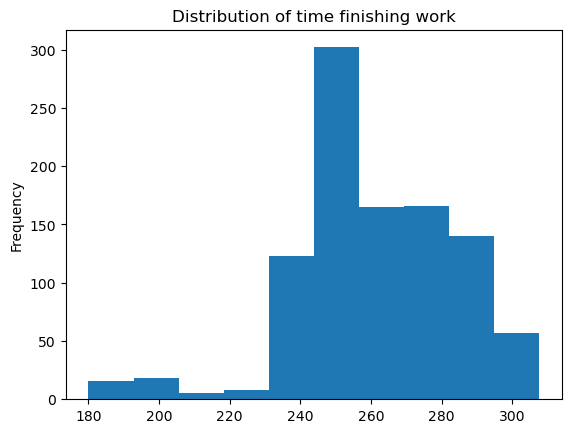

In [17]:
# Sample run 4 (You may have to run this twice for the graph to show; small variations in results are to be expected)
import pandas as pd
locations=['Downtown', 'Airport']
initial='Airport'
transition_probs={'Downtown':[0.7,0.3],'Airport':[1,0]}
df_a=pd.DataFrame([[10,40],[50,0]],index=locations,columns=locations)
df_b=pd.DataFrame([[20,60],[70,0]],index=locations,columns=locations)
df_earnings=pd.DataFrame([[7,30],[40,0]],index=locations,columns=locations)
earnings=[]
last_location=[]
last_time=[]
for i in range(1000):
    t,l,e=driver_movement(locations,initial,transition_probs,df_a,df_b,df_earnings,10,240)
    earnings.append(e[-1])
    last_location.append(l[-1])
    last_time.append(t[-1])
    
import numpy as np
import matplotlib.pyplot as plt
pd.Series(last_time).plot(kind='hist', title='Distribution of time finishing work')
print(f'Average earning: \t${np.mean(earnings):.0f}\t\t Std: {np.std(earnings):.0f}')
print(f'Average end time: \t{np.mean(last_time):.0f} minutes\t Std: {np.std(last_time):.0f}')
s=pd.Series(last_location).value_counts()
print(f"Proportion of time ending work at airport: {s['Airport']/len(last_location):.2f}")
plt.show()

Average earning: 	$126		 Std: 16
Average end time: 	211 minutes	 Std: 23


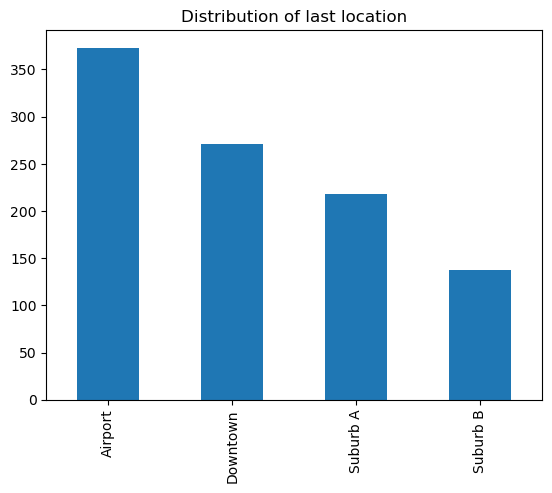

In [18]:
# Sample run 5 (You may have to run this twice for the graph to show; small variations in results are to be expected)
import pandas as pd
locations=['Downtown','Airport','Suburb A','Suburb B']
initial='Suburb A'
transition_probs={'Downtown': [0.1,0.2,0.3,0.4],\
                 'Airport':[0.5,0,0.3,0.2],\
                 'Suburb A':[0.4,0.4,0.1,0.1],\
                 'Suburb B':[0.3,0.5,0.2,0]}
df_a=pd.DataFrame([[5,30,20,15],\
                   [50,5,60,30],\
                   [25,80,5,50],\
                   [20,40,50,5]],index=locations,columns=locations)
df_b=pd.DataFrame([[10,40,30,25],\
                   [60,5,90,60],\
                   [40,100,10,80],\
                   [30,50,80,10]],index=locations,columns=locations)
df_earnings=pd.DataFrame([[7,20,15,10],\
                         [40,0,50,30],\
                         [18,50,0,30],\
                         [15,30,40,0]],index=locations,columns=locations)
earnings=[]
last_location=[]
last_time=[]
for i in range(1000):
    t,l,e=driver_movement(locations,initial,transition_probs,df_a,df_b,df_earnings,10,180)
    earnings.append(e[-1])
    last_location.append(l[-1])
    last_time.append(t[-1])
    
import numpy as np
import matplotlib.pyplot as plt
print(f'Average earning: \t${np.mean(earnings):.0f}\t\t Std: {np.std(earnings):.0f}')
print(f'Average end time: \t{np.mean(last_time):.0f} minutes\t Std: {np.std(last_time):.0f}')
pd.Series(last_location).value_counts().plot(kind='bar',title='Distribution of last location')
plt.show()